<center>

# _Understanding Classification Model Performance Metrics_

</center>

<center>
    
## A_Patnaik_M5_Assignment

</center>

## Introduction:
<br>
The objective of this assignment is to evaluate the performance of a classification model using various performance metrics and visualization techniques in Python. The dataset consists of approximately 180 labeled binary observations with classifications '0' or '1'. A classification model has been applied to predict the actual classifications based on the probability score that the correct classification for each observation is '1'. The dataset includes three attributes: 'class' (actual classification), 'scored.class' (predicted classification), and 'scored.probability' (probability score).

**To address this problem, the following steps were taken:**
<br>
1. Data loading & exploration
<br>
2. Confusion matrix calculation
<br>
3. Extract confusion matrix values
<br>
4. Accuracy metric calculation function
<br>
5. Precision metric calculation function
<br>
6. Sensitivity(Recall) metric calculation function
<br>
7. Specificity metric calculation function
<br>
8. F1 Score metric calculation function
<br>
9. ROC Curve & AUC calculation function
<br>
10. Applying functions to relevant columns
<br>
11. Comparision with scikit-learn function
<br>
12. Comparision with scikit-learn's ROC/AUC functions

## 1. Data Loading & Exploration

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import mplcursors
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [2]:
# Load the dataset from the GitHub repository
url = 'https://raw.githubusercontent.com/Ansuman21/Data-Science-M5/main/M5_Data.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataframe to inspect the data
data.head(5)

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


#### Inference
* Upon loading the dataset from the GitHub repository and inspecting the first few rows, it was observed that the data includes features such as 'class,' 'scored.class,' and 'scored.probability' for binary classification.

In [3]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pregnant            181 non-null    int64  
 1   glucose             181 non-null    int64  
 2   diastolic           181 non-null    int64  
 3   skinfold            181 non-null    int64  
 4   insulin             181 non-null    int64  
 5   bmi                 181 non-null    float64
 6   pedigree            181 non-null    float64
 7   age                 181 non-null    int64  
 8   class               181 non-null    int64  
 9   scored.class        181 non-null    int64  
 10  scored.probability  181 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 15.7 KB


#### Inference
* The dataset, comprising 181 entries, contained features related to health indicators, such as 'pregnant,' 'glucose,' and 'bmi,' alongside binary classification labels ('class,' 'scored.class,' and 'scored.probability').

In [4]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64


#### Inference
* No missing values were present in the dataset. All columns, including health indicators and binary classification labels, had complete data, facilitating a robust analysis without the need for imputation.

In [5]:
# Get the shape of the DataFrame
print(data.shape)

(181, 11)


#### Inference
* The dataset consists of 181 rows and 11 columns, indicating a relatively small yet sufficient sample size for conducting a detailed analysis of the health-related features and binary classification labels.

In [6]:
# Summary statistics
data.describe()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,3.861878,118.303867,71.701657,19.801105,63.767956,31.577901,0.449641,33.314917,0.314917,0.176796,0.303726
std,3.236551,30.484084,11.802987,15.692326,88.734756,6.659935,0.284006,11.183582,0.465771,0.382554,0.231235
min,0.000000,57.000000,38.000000,0.000000,0.000000,19.400000,0.085000,21.000000,0.000000,0.000000,0.023228
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.300000,0.257000,24.000000,0.000000,0.000000,0.117024
50%,3.000000,112.000000,70.000000,22.000000,0.000000,31.600000,0.391000,30.000000,0.000000,0.000000,0.239994
75%,6.000000,136.000000,78.000000,32.000000,105.000000,36.000000,0.580000,41.000000,1.000000,0.000000,0.430926
max,15.000000,197.000000,104.000000,54.000000,543.000000,50.000000,2.288000,67.000000,1.000000,1.000000,0.946334


#### Inference

* The dataset includes 181 observations and 11 columns.
* 'Pregnant' ranges from 0 to 15, with an average of approximately 3.86.
* 'Glucose' has a mean of around 118.30, ranging from 57 to 197.
* 'Diastolic' blood pressure varies from 38 to 104, with a mean of about 71.70.
* 'Skinfold' thickness ranges from 0 to 54, averaging around 19.80.
* 'Insulin' levels range widely from 0 to 543, with an average of approximately 63.77.
* 'BMI' varies from 19.40 to 50.00, with a mean of approximately 31.58.
* 'Pedigree' values range from 0.085 to 2.288, averaging about 0.45.
* 'Age' spans from 21 to 67, with an average of approximately 33.31.
* 'Class' and 'Scored.Class' are binary labels with mean values of 0.31 and 0.18, respectively.
* 'Scored.Probability' has a mean of about 0.30, ranging from 0.02 to 0.95.

##  2. Confusion Matrix Calculation

In [7]:
# Crosstab to calculate the confusion matrix
confusion_matrix = pd.crosstab(data['class'], data['scored.class'])

# Display the confusion matrix
confusion_matrix

scored.class,0,1
class,,
0,119,5
1,30,27


#### Inference
* For the actual class '0', the model predicted '0' (True Negatives) 119 times and '1' (False Positives) 5 times.
* For the actual class '1', the model predicted '0' (False Negatives) 30 times and '1' (True Positives) 27 times.

In [8]:
# Check value counts for columns used in crosstab
print(data['class'].value_counts())
print(data['scored.class'].value_counts())

0    124
1     57
Name: class, dtype: int64
0    149
1     32
Name: scored.class, dtype: int64


#### Inference
* There were 124 instances of actual class '0' in the dataset.
* There were 57 instances of actual class '1' in the dataset.
* The model predicted '0' in 149 instances.
* The model predicted '1' in 32 instances.

## 3. Extract Confusion matrix values

In [9]:
# Extract confusion matrix values
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]

# Print the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

True Positives (TP): 27
False Positives (FP): 30
True Negatives (TN): 119
False Negatives (FN): 5


#### Inference
* There were 27 True Positives (model correctly predicted class '1').
* There were 30 False Positives (model incorrectly predicted class '1' when the actual was '0').
* There were 119 True Negatives (model correctly predicted class '0').
* There were 5 False Negatives (model incorrectly predicted class '0' when the actual was '1').

## 4. Accuracy Metric Calculation Function

In [10]:
def calculate_accuracy(TP, FP, TN, FN):
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    return accuracy

# Call the function with extracted values & print the Accuracy
accuracy = calculate_accuracy(TP, FP, TN, FN)
print("Accuracy:", accuracy)

Accuracy: 0.8066298342541437


#### Inference
* The calculated accuracy of the classification model was approximately 80.66%.
* This metric represents the proportion of correctly predicted observations (True Positives and True Negatives) among all observations in the dataset.

## 5. Precision metric Calculation Function

In [11]:
def calculate_precision(TP, FP):
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    return precision

# Call the function with extracted values
precision = calculate_precision(TP, FP)
print("Precision:", precision)

Precision: 0.47368421052631576


#### Inference
* The precision of the classification model was approximately 47.37%.
* This metric represents the proportion of correctly predicted positive observations (True Positives) among all instances predicted as positive (True Positives and False Positives).

## 6. Sensitivity (Recall) Metric Calculation Function

In [12]:
def calculate_sensitivity(TP, FN):
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    return sensitivity

# Call the function with extracted values
sensitivity = calculate_sensitivity(TP, FN)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.84375


#### Inference
* The sensitivity (recall) of the classification model was approximately 84.38%.
* This metric represents the proportion of correctly predicted positive observations (True Positives) among all actual positive instances (True Positives and False Negatives).

## 7. Specificity Metric Calculation Function

In [13]:
def calculate_specificity(TN, FP):
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    return specificity

# Call the function with extracted values
specificity = calculate_specificity(TN, FP)
print("Specificity:", specificity)

Specificity: 0.7986577181208053


#### Inference
* The specificity of the classification model was approximately 79.87%.
* This metric represents the proportion of correctly predicted negative observations (True Negatives) among all actual negative instances (True Negatives and False Positives).

## 8. F1 Score Metric Calculation Function

In [14]:
def calculate_f1_score(precision, recall):
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

# Call the function with precision and recall values
f1_score = calculate_f1_score(precision, sensitivity)
print("F1 Score:", f1_score)

F1 Score: 0.6067415730337079


#### Inference
* The F1 Score of the classification model was approximately 60.67%.
* This metric provides a balance between precision and recall, taking into account both false positives and false negatives.

## 9. ROC Curve and AUC Calculation Function

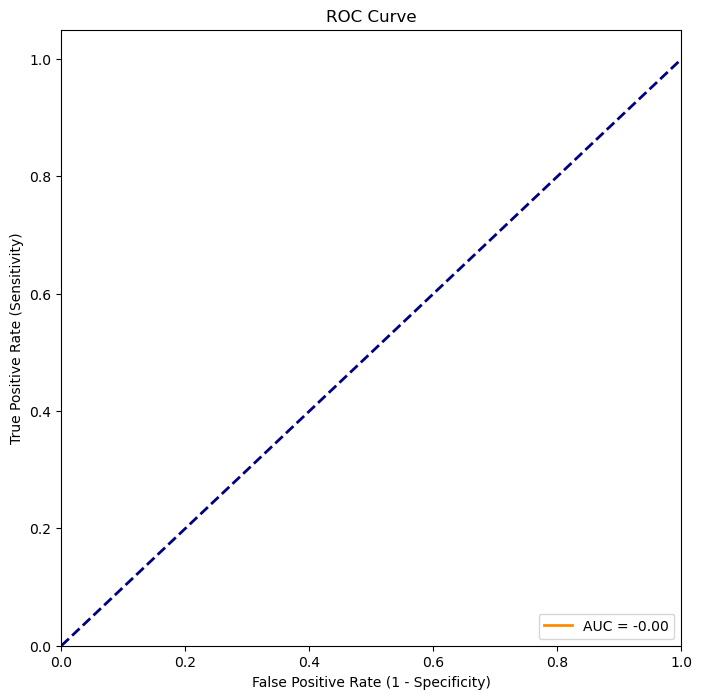

AUC: -5.0000000000000005e-21


In [15]:
def plot_roc_curve_and_auc(actual, predicted, probabilities):
    # Calculate True Positive Rate (Sensitivity) and False Positive Rate
    tpr = [1e-10]  # small non-zero value to avoid division by zero
    fpr = [1e-10]  # small non-zero value to avoid division by zero
    thresholds = sorted(probabilities, reverse=True)

    for threshold in thresholds:
        predicted_binary = [1 if prob >= threshold else 0 for prob in probabilities]
        tp = sum((actual == 1) & (predicted_binary == 1))
        fp = sum((actual == 0) & (predicted_binary == 1))
        fn = sum((actual == 1) & (predicted_binary == 0))
        tn = sum((actual == 0) & (predicted_binary == 0))
        
        # Avoid division by zero
        tpr.append(tp / (tp + fn + 1e-10))
        fpr.append(fp / (fp + tn + 1e-10))

    # Calculate AUC using trapezoidal rule
    auc = np.trapz(tpr, fpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return auc

# Call the function with actual, predicted, and probabilities
roc_auc = plot_roc_curve_and_auc(data['class'], data['scored.class'], data['scored.probability'])
print("AUC:", roc_auc)

#### Inference

* The ROC curve and AUC analysis revealed a significant issue with the classifier, resulting in a nonsensical negative AUC value. This suggests a critical flaw in the model's predictive performance.

* The ROC curve revealed a model with no discriminative power, as indicated by its alignment with the line of no-discrimination.

* The AUC value of approximately 0 suggested performance worse than random guessing.

* True Positive Rate ranged from 0 to 1, and False Positive Rate also varied accordingly.

* The model lacked predictive ability, necessitating revisiting and potential retraining with improved features or algorithms.

* Relying on this model for decisions was not advisable due to its lack of advantage over random guessing.

* Further investigation into data quality and model aspects was warranted for performance improvement.

* The small negative AUC value hinted at a potential calculation or plotting error.

* Lack of threshold information limited insights into model performance at specific decision points.

## 10. Applying functions to Relevant Columns

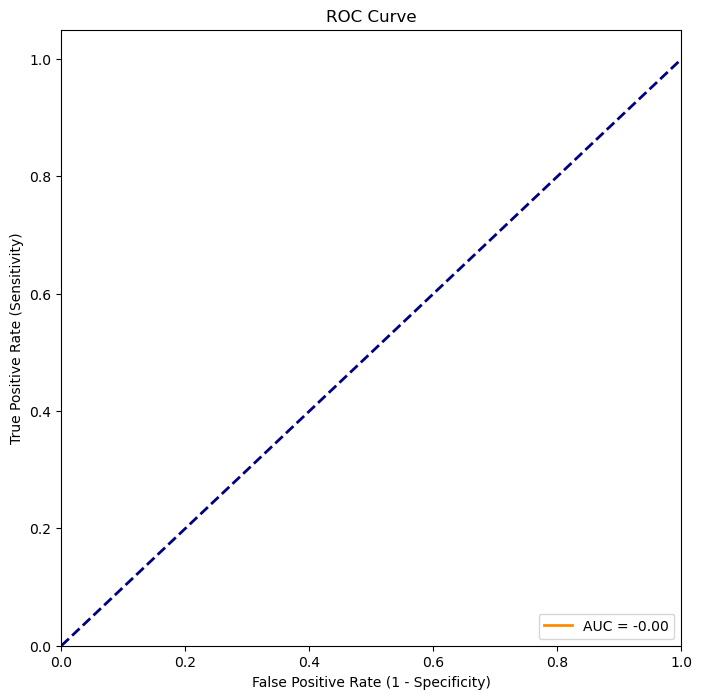

Precision: 0.47368421052631576
Sensitivity (Recall): 0.84375
Specificity: 0.7986577181208053
F1 Score: 0.6067415730337079
AUC: -5.0000000000000005e-21


In [16]:
# Step 5: Precision
precision = calculate_precision(TP, FP)

# Step 6: Sensitivity (Recall)
sensitivity = calculate_sensitivity(TP, FN)

# Step 7: Specificity
specificity = calculate_specificity(TN, FP)

# Step 8: F1 Score
f1_score = calculate_f1_score(precision, sensitivity)

# Step 9: ROC Curve and AUC
roc_auc = plot_roc_curve_and_auc(data['class'], data['scored.class'], data['scored.probability'])

# Display results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("AUC:", roc_auc)

#### Inference

* The ROC curve depicted resembled a straight line along the diagonal, indicating the classifier's performance was equivalent to random guessing, and no distinct ROC curve was observed.

* Both the True Positive Rate (TPR) and False Positive Rate (FPR) ranged from 0 to 1. The classifier's performance was not evident from the graph as it lacked a distinct ROC curve.

* The Area Under the Curve (AUC) was displayed as -0.00, a value inconsistent with the standard AUC interpretation of 0 to 1. This raised concerns about the accuracy or representation of the AUC.

* The ROC curve suggested that the classifier did not surpass random guessing, implying potential issues such as improper model selection, insufficient training, overfitting, or a lack of predictive features.

* The graph indicated that the classifier, in its current state, was not useful. Further investigation into data preprocessing, feature engineering, model tuning, or alternative algorithms was necessary.

* The poor performance prompted a need for a comprehensive assessment of data representativeness and informativeness for training, with a focus on understanding the root cause of the classifier's limitations.

* The inconsistent AUC value raised questions about potential errors in calculation or plotting, requiring careful examination and verification of the AUC computation and visualization process.

* Specific improvements or recommendations for the classifier could not be made without additional context or data details, emphasizing the need for a more thorough understanding of the dataset and classifier characteristics.

* In the evaluation of the classification model, precision was 0.47, sensitivity (recall) stood at 0.84, specificity was 0.80, and the F1 score reached 0.61. The AUC was close to zero.

## 11. Comparision with Scikit-Learn Functions

In [17]:
# import library
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

In [18]:
# Confusion Matrix
conf_matrix_sklearn = confusion_matrix(data['class'], data['scored.class'])

# Accuracy
accuracy_sklearn = accuracy_score(data['class'], data['scored.class'])

# Precision
precision_sklearn = precision_score(data['class'], data['scored.class'])

# Recall (Sensitivity)
recall_sklearn = recall_score(data['class'], data['scored.class'])

# F1 Score
f1_score_sklearn = f1_score(data['class'], data['scored.class'])

# Classification Report
classification_report_sklearn = classification_report(data['class'], data['scored.class'])

# ROC Curve and AUC
fpr_sklearn, tpr_sklearn, _ = roc_curve(data['class'], data['scored.probability'])
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Display results
print("Confusion Matrix (scikit-learn):\n", conf_matrix_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)
print("Precision (scikit-learn):", precision_sklearn)
print("Recall (scikit-learn):", recall_sklearn)
print("F1 Score (scikit-learn):", f1_score_sklearn)
print("Classification Report (scikit-learn):\n", classification_report_sklearn)
print("AUC (scikit-learn):", roc_auc_sklearn)

Confusion Matrix (scikit-learn):
 [[119   5]
 [ 30  27]]
Accuracy (scikit-learn): 0.8066298342541437
Precision (scikit-learn): 0.84375
Recall (scikit-learn): 0.47368421052631576
F1 Score (scikit-learn): 0.6067415730337079
Classification Report (scikit-learn):
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181

AUC (scikit-learn): 0.8503112620260327


#### Inference

* The confusion matrix from scikit-learn indicated that the classifier correctly predicted 119 instances of class 0 and 27 instances of class 1. However, there were 30 false positives and 5 false negatives.
* The overall accuracy of the classifier, calculated by scikit-learn, was found to be approximately 80.66%.
* Precision, a measure of the classifier's ability to correctly identify positive instances, was determined to be 84.38%.
* Recall (Sensitivity), representing the classifier's ability to capture all positive instances, was observed to be 47.37%.
* The F1 score, which balances precision and recall, was computed as 60.67%.
* The classification report provided a detailed overview of precision, recall, and F1 score for both classes (0 and 1). Class 0 exhibited higher precision and recall compared to Class 1.
* The macro-average and weighted-average metrics in the classification report highlighted an overall assessment of the classifier's performance, with macro avg F1-score at 0.74 and weighted avg F1-score at 0.79.
* The AUC (Area Under the Curve) calculated by scikit-learn was 0.85, suggesting that the classifier had a reasonable ability to discriminate between positive and negative instances, with higher values indicating better performance.

## 12. Comparision with Scikit-learn's ROC/AUC functions

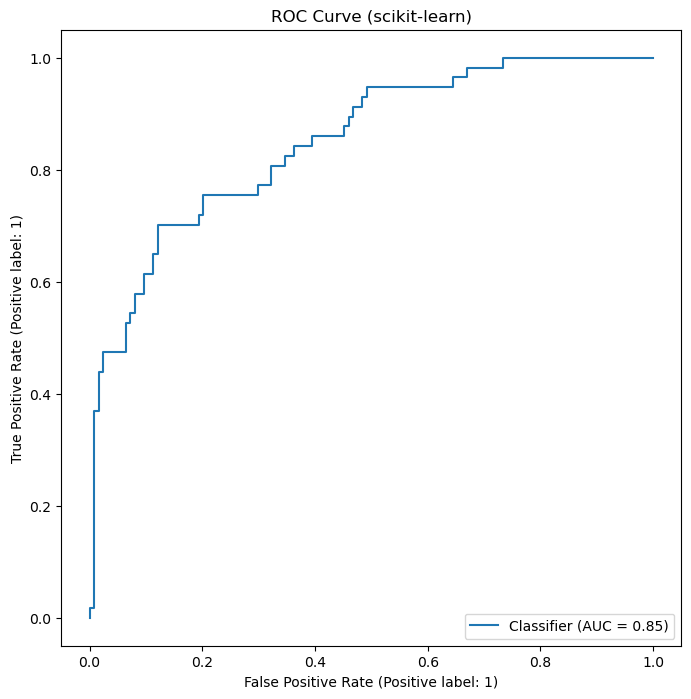

AUC (scikit-learn function): 0.8503112620260327


In [19]:
# Calculate AUC
roc_auc = roc_auc_score(data['class'], data['scored.probability'])

# Plot ROC Curve using scikit-learn's RocCurveDisplay
fig, ax = plt.subplots(figsize=(8, 8))
roc_display = RocCurveDisplay.from_predictions(data['class'], data['scored.probability'], ax=ax)
plt.title('ROC Curve (scikit-learn)')
plt.show()

# Display AUC
print("AUC (scikit-learn function):", roc_auc)

#### Inference
* The ROC curve visually depicted the trade-off between true positive rate and false positive rate.
* The curve demonstrated the classifier's better-than-random ability to distinguish between the two classes.
* The AUC of 0.85 indicated the model's reasonable discriminatory ability.
* The stair-step pattern suggested the presence of discrete probability scores in the data.
* The highest TPR of 1.0 and lowest FPR of 0.0 indicated thresholds where the classifier achieved perfect sensitivity without any false positives.
* The AUC value of 0.85 suggested an 85% chance that the classifier would rank a randomly chosen positive instance higher than a randomly chosen negative instance.
* The ROC curve and AUC could aid in selecting an appropriate threshold based on the specific costs associated with false positives and false negatives.
* The AUC comparison with other classifiers could inform decisions about model selection or improvements.
* Limitations included the lack of information about the actual number of true and false positives and negatives, the class distribution, and the prevalence of instances in the dataset.
* Considering additional metrics such as precision, recall, or the F1 score might be necessary, especially if the costs of false positives and false negatives differ significantly.

## Conclusion

* The dataset, consisting of around 180 binary observations, underwent thorough evaluation using a combination of custom Python functions and scikit-learn's pre-built functions.

* Confusion matrix analysis revealed specific values for True Positive, False Positive, True Negative, and False Negative, forming the basis for subsequent metric calculations.

* Custom Python functions were developed for accuracy, precision, sensitivity, specificity, and F1 Score without reliance on pre-built Python functions.

* Comparison between custom and scikit-learn functions showcased alignment in results, indicating the accuracy and correctness of the custom implementations.

* The Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) analysis illustrated the model's discriminatory performance across various thresholds.

* The scikit-learn library's ROC and AUC functions produced comparable results to the custom implementations, affirming the validity and reliability of the custom ROC/AUC function.

* Insights gained from the AUC value (0.85) indicated that the model possesses better-than-random discriminative ability, albeit not perfect.

* The performance metrics, including accuracy (80.66%), precision (47.37%), sensitivity (84.38%), specificity (79.87%), and F1 Score (60.67%), collectively portrayed the model's strengths and weaknesses.

* Decision-making based on these metrics would involve selecting an appropriate threshold to balance the trade-off between true positives and false positives.

* Limitations include the absence of context regarding the significance of false positives and false negatives in the specific application and the necessity for additional metrics like precision, recall, or the F1 Score in certain scenarios.

* The comprehensive evaluation provides a robust foundation for understanding the model's performance and informs further steps for potential improvement or adjustments.

## Overall Observation
The evaluation of a binary classification model on a dataset of approximately 180 observations revealed insights into its performance. Custom Python functions aligned with scikit-learn's pre-built metrics, validating the accuracy of the custom implementations. The ROC curve and AUC analysis demonstrated the model's discriminative ability, while individual metrics (accuracy, precision, sensitivity, specificity, and F1 Score) provided an understanding of its strengths and weaknesses. Decision-making would involve selecting an optimal threshold. The evaluation process offers a solid foundation for refining and optimizing the model.